In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [2]:
df = pd.read_csv('../data/moonson_barat/1991.csv', delimiter=',', header=0)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df)
    print('\n\n\n\nJumlah data : ',len(df))

     Posisi_LS   Posisi_BT  Yellowfin  Bigeye  Albacore
0    -7.900000  116.833333         14       2         0
1    -7.966667  116.783333         23       2         0
2    -7.416667  120.483333         12       1         0
3    -7.866667  116.833333         20       0         8
4    -7.100000  120.016667         20       6         0
5    -7.866667  117.333333         24       0         0
6    -7.866667  117.583333         20       2         0
7    -8.033333  117.900000          2       0         0
8    -7.850000  116.666667         18       2         0
9    -8.033333  117.100000         23       0         0
10   -7.916667  118.083333          8       2         0
11   -7.050000  119.850000         13       0         0
12   -7.900000  116.633333         15       0         0
13   -7.900000  116.916667         20       1         0
14   -7.933333  116.566667          0       0         0
15   -7.966667  117.583333         13       0         0
16   -7.633333  117.483333         24       2   

In [3]:
# Generate some clusters!
# n_clusters = 50
# clusters_x, clusters_y = cluster_gen(n_clusters)

# # Convert to a single dataset in OpenCV format
# data = np.float32((np.concatenate(clusters_x), np.concatenate(clusters_y))).transpose()

data=df

X = StandardScaler().fit_transform(data)

# Define max_distance (eps parameter in DBSCAN())
db = DBSCAN(eps=1.5, min_samples=5).fit(data)

# Extract a mask of core cluster members
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Extract labels (-1 is used for outliers)
labels = db.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_cluster = n_clusters + 1
unique_labels = set(labels)
n_noise_ = list(labels).count(-1)

/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [4]:
print('Estimated number of clusters: %d' % n_clusters)
print('Total Data : ', len(data))
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 8
Total Data :  977
Estimated number of noise points: 508
Silhouette Coefficient: -0.271


Text(0.5, 1.0, 'Original Data')

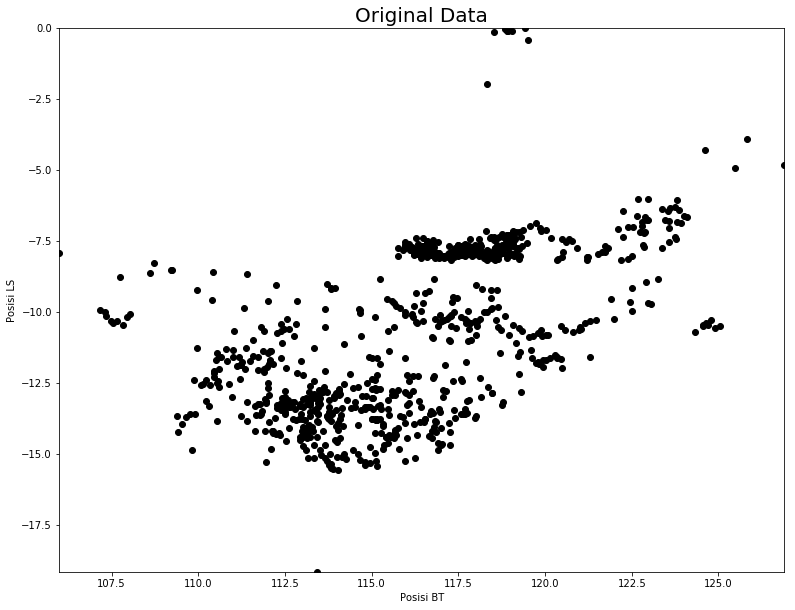

In [5]:
%matplotlib inline
# Plot up the results!
min_x = np.min(data['Posisi_BT'])
max_x = np.max(data['Posisi_BT'])
min_y = np.min(data['Posisi_LS'])
max_y = np.max(data['Posisi_LS'])

fig = plt.figure(figsize=(13,10))
plt.plot(data['Posisi_BT'], data['Posisi_LS'], 'ko')
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)
plt.ylabel('Posisi LS')
plt.xlabel('Posisi BT')
plt.title('Original Data', fontsize = 20)

<IPython.core.display.Javascript object>


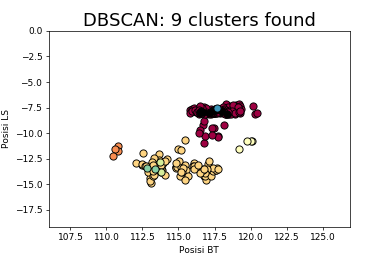


      Posisi_LS   Posisi_BT  Yellowfin  Bigeye  Albacore
0    -7.900000  116.833333         14       2         0
6    -7.866667  117.583333         20       2         0
7    -8.033333  117.900000          2       0         0
10   -7.916667  118.083333          8       2         0
12   -7.900000  116.633333         15       0         0
13   -7.900000  116.916667         20       1         0
14   -7.933333  116.566667          0       0         0
15   -7.966667  117.583333         13       0         0
17   -8.083333  116.933333          1       0         0
18   -8.066667  117.200000         15       1         0
19   -7.383333  120.166667          7       0         0
20   -8.066667  116.600000         10       1         0
21   -7.750000  117.600000         15       3         0
22   -8.033333  117.383333          9       0         0
23   -7.650000  117.500000         13       2         0
24   -7.850000  117.566667          5       0         0
25   -7.850000  117.566667          4       0 

In [7]:
%matplotlib notebook
# plt.subplt(122)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == 1:
        # block used noise.
        col = [0, 0, 0, 1]
        
    class_member_mask = (labels == k)

    xy = data[class_member_mask & core_samples_mask]
    plt.plot(xy['Posisi_BT'], xy['Posisi_LS'], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)
    print('\n', xy,'\nMember of Cluster : ', len(xy))

    # xy = data[class_member_mask & ~core_samples_mask]
    # plt.plot(xy['Posisi_BT'], xy['Posisi_LS'], 'o', markerfacecolor=tuple(col),
             # markeredgecolor='k', markersize=3)
    
# Plot up the results!
# min_x = np.min(data['Posisi_BT'])
# max_x = np.max(data['Posisi_BT'])
# min_y = np.min(data['Posisi_LS'])
# max_y = np.max(data['Posisi_LS'])
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)
plt.ylabel('Posisi LS')
plt.xlabel('Posisi BT')
plt.title('DBSCAN: %d clusters found' % n_cluster, fontsize = 20)
fig.tight_layout()
plt.show()